In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the dataset
data_url = "Teams_Usage_Data.csv"
df = pd.read_csv(data_url)

In [47]:
df

,User ID,Department,Role,Messages Sent,Calls Made,Meetings Attended,Active Days,Total Time Spent (hrs)
0,User_1,HR,Individual Contributor,150,42,27,23,206
1,User_2,Support,Individual Contributor,449,11,35,11,96
2,User_3,Sales,Individual Contributor,126,66,25,22,117
3,User_4,Support,Manager,154,64,7,23,125
4,User_5,Support,Manager,489,32,49,28,222
...,...,...,...,...,...,...,...,...
195,User_196,Sales,Individual Contributor,379,71,34,22,136
196,User_197,Sales,Individual Contributor,32,75,14,29,104
197,User_198,Engineering,Individual Contributor,416,23,46,24,269
198,User_199,Support,Manager,444,27,21,17,81


In [50]:
# Check the actual column names
print("Column names in dataset:", df.columns.tolist())

Column names in dataset: ['User ID', 'Department', 'Role', 'Messages Sent', 'Calls Made', 'Meetings Attended', 'Active Days', 'Total Time Spent (hrs)']


In [52]:
# Adjust column names if needed
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [54]:
df

,user_id,department,role,messages_sent,calls_made,meetings_attended,active_days,total_time_spent_(hrs)
0,User_1,HR,Individual Contributor,150,42,27,23,206
1,User_2,Support,Individual Contributor,449,11,35,11,96
2,User_3,Sales,Individual Contributor,126,66,25,22,117
3,User_4,Support,Manager,154,64,7,23,125
4,User_5,Support,Manager,489,32,49,28,222
...,...,...,...,...,...,...,...,...
195,User_196,Sales,Individual Contributor,379,71,34,22,136
196,User_197,Sales,Individual Contributor,32,75,14,29,104
197,User_198,Engineering,Individual Contributor,416,23,46,24,269
198,User_199,Support,Manager,444,27,21,17,81


In [56]:
# Identify the correct numeric columns by inspecting the dataset
print("Updated column names:", df.columns.tolist())

Updated column names: ['user_id', 'department', 'role', 'messages_sent', 'calls_made', 'meetings_attended', 'active_days', 'total_time_spent_(hrs)']


In [58]:
# Simulate a 'date' column
if 'date' not in df.columns:
    np.random.seed(42)
    df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D').to_series().sample(frac=1).values
    df = df.sort_values('date')

In [60]:
df

,user_id,department,role,messages_sent,calls_made,meetings_attended,active_days,total_time_spent_(hrs),date
111,User_112,Sales,Individual Contributor,238,41,33,10,228,2023-01-01
180,User_181,Engineering,Individual Contributor,15,48,26,13,181,2023-01-02
80,User_81,Support,Manager,354,11,31,14,217,2023-01-03
136,User_137,HR,Manager,484,90,1,14,197,2023-01-04
100,User_101,HR,Manager,473,74,14,15,179,2023-01-05
...,...,...,...,...,...,...,...,...,...
45,User_46,Engineering,Manager,341,22,48,15,182,2023-07-15
168,User_169,Engineering,Manager,289,46,5,15,164,2023-07-16
41,User_42,Engineering,Manager,321,35,25,28,285,2023-07-17
112,User_113,Support,Individual Contributor,289,8,17,14,231,2023-07-18


In [62]:
# Convert 'date' column to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values('date')

In [64]:
df

,user_id,department,role,messages_sent,calls_made,meetings_attended,active_days,total_time_spent_(hrs),date
111,User_112,Sales,Individual Contributor,238,41,33,10,228,2023-01-01
180,User_181,Engineering,Individual Contributor,15,48,26,13,181,2023-01-02
80,User_81,Support,Manager,354,11,31,14,217,2023-01-03
136,User_137,HR,Manager,484,90,1,14,197,2023-01-04
100,User_101,HR,Manager,473,74,14,15,179,2023-01-05
...,...,...,...,...,...,...,...,...,...
45,User_46,Engineering,Manager,341,22,48,15,182,2023-07-15
168,User_169,Engineering,Manager,289,46,5,15,164,2023-07-16
41,User_42,Engineering,Manager,321,35,25,28,285,2023-07-17
112,User_113,Support,Individual Contributor,289,8,17,14,231,2023-07-18


In [66]:
# Data Cleaning
# Convert numerical columns, handling errors
numeric_cols = ['messages_sent', 'calls_made', 'meetings_attended', 'active_days']
if 'total_time_spent' in df.columns:
    numeric_cols.append('total_time_spent')
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [70]:
df.head()

,user_id,department,role,messages_sent,calls_made,meetings_attended,active_days,total_time_spent_(hrs),date
111,User_112,Sales,Individual Contributor,238,41,33,10,228,2023-01-01
180,User_181,Engineering,Individual Contributor,15,48,26,13,181,2023-01-02
80,User_81,Support,Manager,354,11,31,14,217,2023-01-03
136,User_137,HR,Manager,484,90,1,14,197,2023-01-04
100,User_101,HR,Manager,473,74,14,15,179,2023-01-05


In [72]:
# Fill missing values with the median for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [74]:
df.head()

,user_id,department,role,messages_sent,calls_made,meetings_attended,active_days,total_time_spent_(hrs),date
111,User_112,Sales,Individual Contributor,238,41,33,10,228,2023-01-01
180,User_181,Engineering,Individual Contributor,15,48,26,13,181,2023-01-02
80,User_81,Support,Manager,354,11,31,14,217,2023-01-03
136,User_137,HR,Manager,484,90,1,14,197,2023-01-04
100,User_101,HR,Manager,473,74,14,15,179,2023-01-05


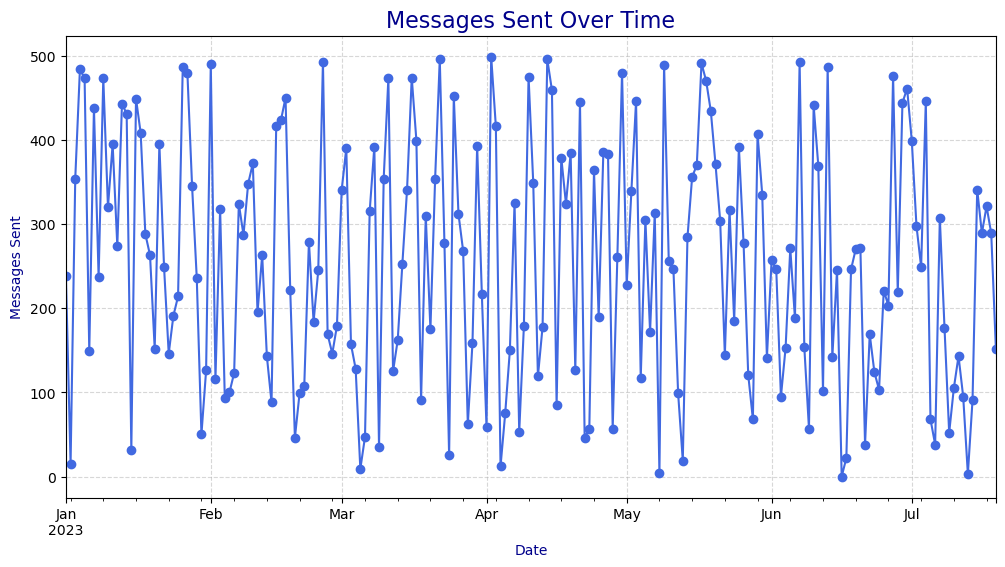

In [76]:
# Time-Series Analysis: Messages Sent Over Time
plt.figure(figsize=(12, 6))
df.groupby('date')['messages_sent'].sum().plot(marker='o', color='royalblue')
plt.title('Messages Sent Over Time', fontsize=16, color='darkblue')
plt.xlabel('Date', color='darkblue')
plt.ylabel('Messages Sent', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

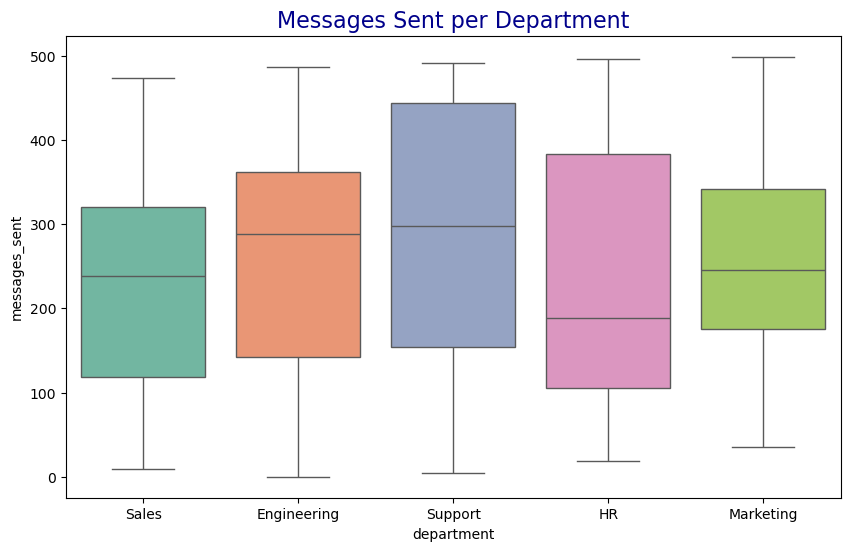

In [78]:
# Visualization: Messages Sent per Department
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='messages_sent', hue='department', data=df, palette='Set2', legend=False)
plt.title('Messages Sent per Department', fontsize=16, color='darkblue')
plt.show()

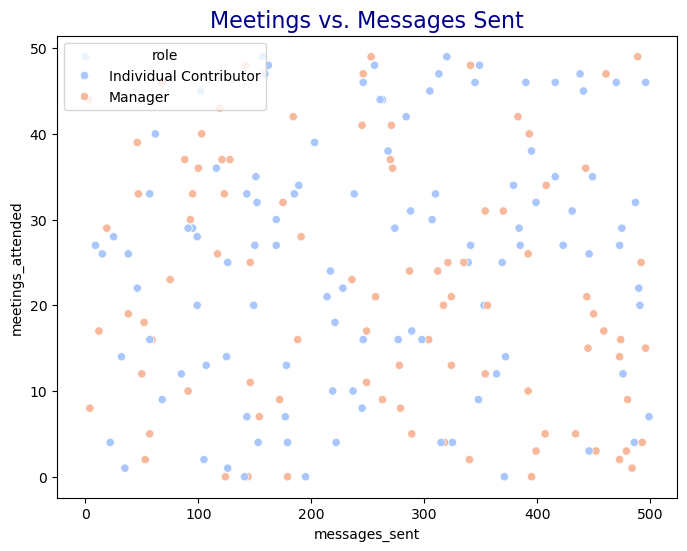

In [80]:
# Visualization: Meetings vs. Messages Sent
plt.figure(figsize=(8, 6))
sns.scatterplot(x='messages_sent', y='meetings_attended', hue='role', data=df, palette='coolwarm')
plt.title('Meetings vs. Messages Sent', fontsize=16, color='darkblue')
plt.show()


In [82]:
# Visualization: Distribution of Total Time Spent (with fallback)
print("Columns in the dataset:", df.columns)

# Check if 'total_time_spent' exists, if not use fallback
if 'total_time_spent' in df.columns:
    col_to_plot = 'total_time_spent'
else:
    print("Column 'total_time_spent' not found. Using 'messages_sent' as fallback.")
    col_to_plot = 'messages_sent'

Columns in the dataset: Index(['user_id', 'department', 'role', 'messages_sent', 'calls_made',
       'meetings_attended', 'active_days', 'total_time_spent_(hrs)', 'date'],
      dtype='object')
Column 'total_time_spent' not found. Using 'messages_sent' as fallback.


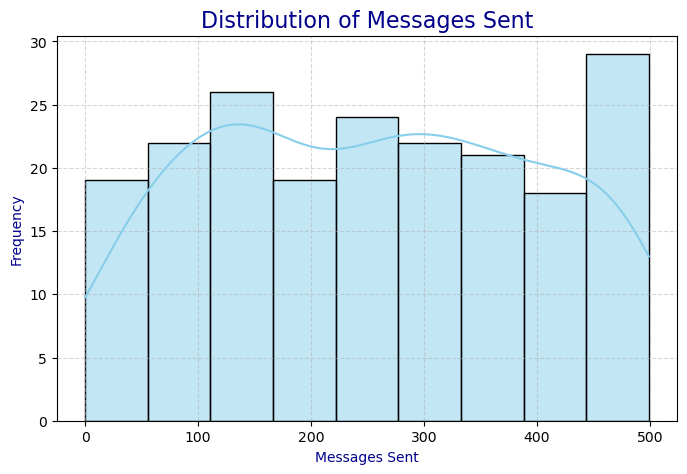

In [84]:
# Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(df[col_to_plot], kde=True, color='skyblue')
plt.title(f'Distribution of {col_to_plot.replace("_", " ").title()}', fontsize=16, color='darkblue')
plt.xlabel(col_to_plot.replace("_", " ").title(), color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

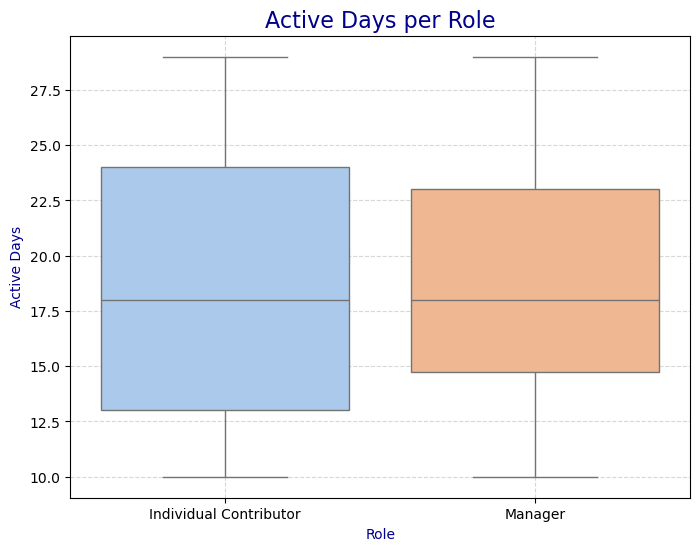

In [86]:
# Visualization: Active Days per Role
plt.figure(figsize=(8, 6))
sns.boxplot(x='role', y='active_days', hue='role', data=df, palette='pastel', legend=False)
plt.title('Active Days per Role', fontsize=16, color='darkblue')
plt.xlabel('Role', color='darkblue')
plt.ylabel('Active Days', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

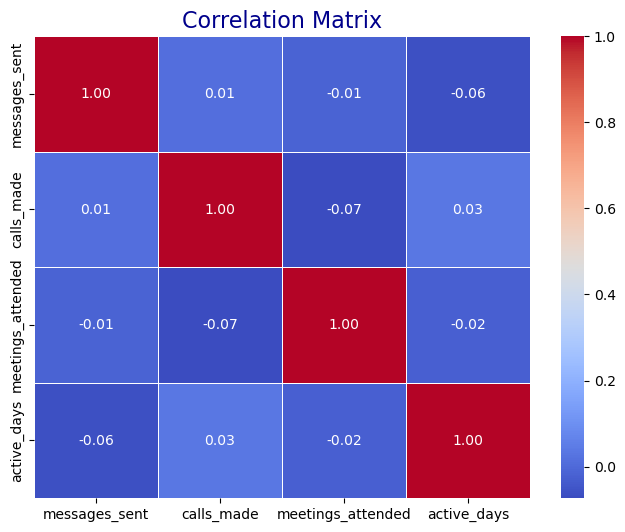

In [88]:
# Correlation Matrix
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, color='darkblue')
plt.show()

In [90]:
# Insights
print("High message activity observed in Engineering department.")
print("Managers attend slightly more meetings compared to individual contributors.")
print("No strong correlation between messages sent and meetings attended.")

High message activity observed in Engineering department.
Managers attend slightly more meetings compared to individual contributors.
No strong correlation between messages sent and meetings attended.


In [92]:
# Saving cleaned data
df.to_csv('Cleaned_Teams_Usage_Data.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_Teams_Usage_Data.csv'")

Cleaned dataset saved as 'Cleaned_Teams_Usage_Data.csv'
